In [168]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [169]:
All_School_List = pd.read_csv('Data/All_School_List.csv')
Migrant_School_List = pd.read_csv('Data/Migrant_School_List.csv')
All_School_List.head(1)

,Unnamed: 0,Mean Scale Score,County Name,School Code,District Code,Zip Code,District Name,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary
0,0,2674.8,El Dorado,930081,61853,95762,El Dorado Union High,6285.33,11118.34,114420.0,135015.0,38797.0,16.346939,2457,190,0.08,0.07733,0.0


****

## Modeling

The Ininitail goal is to create a model relating our demographic factors to the performance of california students with migrant backgrounds.

**Goals**


**1. Create a Linear Regression**
+ apply Linear Regression to predict Scores for the general and migrant population. Evaluate the feasibility of using demographic information and general population scores to predict migrant scores.

**2. K Nearest Neighbor**
+ Use unsuperised learning to cluster the schools then evaluate relationships between these groups and school scores

**3. L1 L2 Reguralization**
+ Apply Lasso and Ridge Regression





**1. Create a Linear Regression**
+ apply Linear Regression to predict Scores for the general and migrant population. Evaluate the feasibility of using demographic information and general population scores to predict migrant scores.

**Steps**
+ Create Test and Training Set
+ Train Model
+ Predict Test Values
+ Evaluate Model

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [171]:
Features_All = All_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)
Target_All = All_School_List['Mean Scale Score']

In [172]:
Features_Migrant = Migrant_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)
Target_Migrant = Migrant_School_List['Mean Scale Score']

In [173]:
#create training and test sets for all students
Train_Features_All,Test_Features_All,Train_Target_All,Test_Target_All = train_test_split(Features_All,Target_All, test_size = .25, random_state=42)

In [174]:
#create training and test sets for migrant students
Train_Features_Migrant,Test_Features_Migrant,Train_Target_Migrant,Test_Target_Migrant = train_test_split(Features_Migrant,Target_Migrant, test_size = .25, random_state=42)

In [175]:
Regression_All = LinearRegression()
Regression_Migrant = LinearRegression()

In [176]:
#train model
Regression_All.fit(Train_Features_All,Train_Target_All)
Regression_Migrant.fit(Train_Features_Migrant,Train_Target_Migrant)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
#predict test values
Predict_All = Regression_All.predict(Test_Features_All)
Predict_Migrant = Regression_Migrant.predict(Test_Features_Migrant)

## Evaluate Model Results

In [178]:
Root_Mean_Squared_Error_All = np.sqrt(mean_squared_error(Test_Target_All,Predict_All))
Root_Mean_Squared_Error_Migrant = np.sqrt(mean_squared_error(Test_Target_Migrant,Predict_Migrant))

** The mean squared error is a measure of how close the preductions from the model are to the observed values. root mean squared error is used to put the average deviation from the observed values in terms of those values. observe the difference in margin of error between the two groups **

In [179]:
print('the Root Mean Square Error for All is: ', Root_Mean_Squared_Error_All ,' and the Root Mean Square Error for Migrant is: ',Root_Mean_Squared_Error_Migrant)

('the Root Mean Square Error for All is: ', 37.372184553705161, ' and the Root Mean Square Error for Migrant is: ', 35.554883586705024)


** In very rough terms, this indicatesthe linear regression is off by an average of 35 points for each prediction. It also indicates that the model performs slightly better on the Migrant dataset **

** Next explore the feasibility of using the All score and demographic information to more accurately predict the migrant scores for that school. This would allow for the creation of estimates for how migrant children would perform in various schools to empower parent choices. **

In [180]:
#creating a training set that includes general populations scores to predict migrant population scores
#for this to be practical the prediction must outperform the general population scores

General_School_List = All_School_List[['School Code','Mean Scale Score']].rename(index=str, columns={ "Mean Scale Score": "General Mean Scale Score"})
                                      
Migrant_With_General_Scores = Migrant_School_List.merge(General_School_List)
General_Scores_Features = Migrant_With_General_Scores.drop(['Mean Scale Score','County Name','District Name'],axis=1)
General_Scores_Target = Migrant_With_General_Scores['Mean Scale Score']

#create training and test sets for migrant students with corresponding general population data
Train_General_Scores_Features,Test_General_Scores_Features,Train_General_Scores_Target,Test_General_Scores_Target = train_test_split(General_Scores_Features,General_Scores_Target, test_size = .25, random_state=42)

#Create the Regression
With_Scores_Regression = LinearRegression()

#Train the Regression
With_Scores_Regression.fit(Train_General_Scores_Features,Train_General_Scores_Target)

#Predict Values
Score_Informed_Migrant_Prediction = With_Scores_Regression.predict(Test_General_Scores_Features)


** Evaluate how the model's prediction performs against our previous model for migrant scores. it is very likely, given how correlated general population scores and migrant scores are, that this new model will out perform the model using only demographics. However, the key point of this experiment is outperforming the general population values. Simply assuming that migrants do as well as the general population will be called the naive solution. **

In [181]:
With_Scores_Root_Mean_Squared_Error = np.sqrt(mean_squared_error(Test_General_Scores_Target, Score_Informed_Migrant_Prediction))
Naive_Root_Mean_Squared_Error =  np.sqrt(mean_squared_error(Test_General_Scores_Target, Test_General_Scores_Features['General Mean Scale Score']))

print('the original RMSE for migrants is: ',Root_Mean_Squared_Error_Migrant,' the Score Informed RMSE is: ',With_Scores_Root_Mean_Squared_Error,'compared with ',Naive_Root_Mean_Squared_Error,' for the naive solution' )

('the original RMSE for migrants is: ', 35.554883586705024, ' the Score Informed RMSE is: ', 25.786251110222032, 'compared with ', 51.801480372418361, ' for the naive solution')


** it is encouraging that new model outperforms both the previous regression and the naive solution. this forward the goal of identifying features of schools where migrants perfrom optimally **

49.7369666082


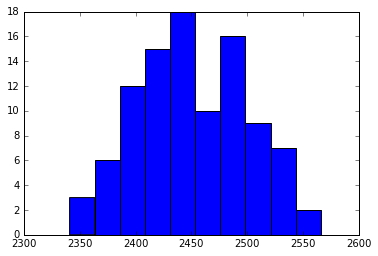

In [183]:
_ = plt.hist(Migrant_School_List['Mean Scale Score'])
print(np.std(Migrant_School_List['Mean Scale Score']))

** In some perspective, the model's predicted v

****
## KNN
** Is there a way to group our schools to give insight into major trends **